# ✨ Capstone Project: MitigasiKita - Analisis Data Gempa dan Tsunami ✨
---


## 🚀 Tim Proyek

**ID Tim:** CC25-CF278

**Anggota Tim:**
* 👨‍💻 **(ML)** MC172D5Y1422 - Dearmawan - Universitas Mikroskil - [Aktif]
* 👩‍💻 **(ML)** MC172D5X1418 - Julianti - Universitas Mikroskil - [Aktif]
* 👨‍💻 **(ML)** MC634D5Y1076 – Zainal Saputra - Universitas - [Aktif]
* 🛠️ **(FEBE)** FC614D5X1635 – Puput Purwaningsih - Universitas Nurdin Hamzah - [Aktif]
* 🛠️ **(FEBE)** FC299D5X2118 – Aprilia Nurhaliza - Universitas Pendidikan Indonesia - [Aktif]
* 🛠️ **(FEBE)** FC613D5Y1033 – Andres Junika Putra – Universitas Mercu Buana Yogyakarta - [Aktif]

---

## 🎯 Pendahuluan Proyek

Proyek **MitigasiKita** bertujuan mengembangkan sistem peringatan dini dan panduan evakuasi gempa serta tsunami menggunakan teknologi **Machine Learning**. Analisis data gempa dan cuaca dilakukan untuk memahami pola bencana dan mendukung model prediksi risiko (Aman, Waspada, Berbahaya).

### 📊 Dataset Utama
* ☀️ `cuaca_indonesia`: Data cuaca di Indonesia.
* 🌍 `katalog_gempa_gabungan_urut`: Katalog gabungan data gempa yang diurutkan.
* 📂 Dataset gabungan: `gempa_dan_cuaca_dengan_prediksi_v2.csv`.

---

## ⚙️ Persiapan Lingkungan dan Import Library

Mengimport semua library yang dibutuhkan dan setup konfigurasi dasar seperti palet warna untuk visualisasi.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from geopy.geocoders import Nominatim
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
import joblib
import os
import warnings
import requests
from datetime import datetime

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 📊 Memuat Dataset

Memuat dataset gabungan yang sudah disiapkan (`gempa_dan_cuaca_dengan_prediksi_v2.csv`).

In [2]:
# Memuat dataset
df = pd.read_csv('gempa_dan_cuaca_dengan_prediksi_v2.csv')

# Menampilkan informasi dasar
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\nInfo dataset:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

# Menghapus baris dengan missing values
df = df.dropna()
print(f"\nJumlah baris setelah pembersihan: {df.shape[0]}")
print(f"Jumlah kolom setelah pembersihan: {df.shape[1]}")

# Menampilkan distribusi kelas target
print("\nDistribusi kelas target:")
print(df['prediksi_risiko'].value_counts())

# Menampilkan 5 baris pertama
df.head()

Jumlah baris: 54901
Jumlah kolom: 22

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54901 entries, 0 to 54900
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   eventID             54901 non-null  object 
 1   datetime            54901 non-null  object 
 2   latitude            54901 non-null  float64
 3   longitude           54901 non-null  float64
 4   magnitude           54838 non-null  float64
 5   mag_type            54838 non-null  object 
 6   depth               54901 non-null  int64  
 7   phasecount          54899 non-null  float64
 8   azimuth_gap         54901 non-null  float64
 9   location            54901 non-null  object 
 10  agency              54901 non-null  object 
 11  date                54901 non-null  object 
 12  city                54901 non-null  object 
 13  time                54901 non-null  object 
 14  temperature_2m_max  54901 non-null  float64
 15  t

,eventID,datetime,latitude,longitude,magnitude,mag_type,depth,phasecount,azimuth_gap,location,...,city,time,temperature_2m_max,temperature_2m_min,precipitation_sum,weathercode,windspeed_10m_max,potensi_gempa,potensi_tsunami,prediksi_risiko
0,bmg2020aaac,2020-01-01 00:02:21.183174+00:00,-2.730515,127.898819,3.294128,M,17,16.0,74.870178,Ceram Sea,...,Ambon,2020-01-01,32.3,25.6,4.6,63,12.8,Rendah,Rendah,Aman
1,bmg2020aaiv,2020-01-01 04:27:36.113891+00:00,-3.387574,128.378189,2.251033,M,10,7.0,161.783195,"Seram, Indonesia",...,Ambon,2020-01-01,32.3,25.6,4.6,63,12.8,Rendah,Rendah,Aman
2,bmg2020aaje,2020-01-01 04:38:04.738063+00:00,2.061754,126.647492,4.114948,M,10,11.0,95.528030,Northern Molucca Sea,...,Ternate,2020-01-01,30.6,26.3,2.6,53,13.8,Rendah,Rendah,Aman
3,bmg2020aaky,2020-01-01 05:31:55.150735+00:00,-9.256731,121.274017,3.817840,M,97,25.0,61.711212,Savu Sea,...,Kupang,2020-01-01,30.1,25.3,11.2,63,10.8,Rendah,Rendah,Waspada
4,bmg2020aalx,2020-01-01 06:01:13.844505+00:00,-6.750792,129.847611,4.815453,M,173,42.0,57.522709,Banda Sea,...,Ambon,2020-01-01,32.3,25.6,4.6,63,12.8,Rendah,Rendah,Aman


**Insight**:
- Dataset awal berisi 54.901 baris dan 22 kolom, termasuk kolom seperti `eventID`, `magnitude`, `depth`, `latitude`, `longitude`, dan data cuaca (`temperature_2m_max`, `precipitation_sum`).
- Pembersihan data menghapus 63 baris dengan nilai kosong pada `magnitude` dan `mag_type`, serta 2 baris pada `phasecount`, menghasilkan 54.836 baris.
- Distribusi kelas target (`prediksi_risiko`) menunjukkan ketidakseimbangan: **Aman (37.727)**, **Waspada (17.100)**, **Berbahaya (9)**, yang memerlukan teknik seperti SMOTE.

## 📈 Exploratory Data Analysis (EDA)

Melakukan analisis awal untuk memahami struktur, statistik, dan distribusi data.

--- Pemeriksaan Missing Values per Kolom ---
eventID               0
datetime              0
latitude              0
longitude             0
magnitude             0
mag_type              0
depth                 0
phasecount            0
azimuth_gap           0
location              0
agency                0
date                  0
city                  0
time                  0
temperature_2m_max    0
temperature_2m_min    0
precipitation_sum     0
weathercode           0
windspeed_10m_max     0
potensi_gempa         0
potensi_tsunami       0
prediksi_risiko       0
dtype: int64

--- Informasi Dataset ---
<class 'pandas.core.frame.DataFrame'>
Index: 54836 entries, 0 to 54900
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   eventID             54836 non-null  object             
 1   datetime            54836 non-null  datetime64[ns, UTC]
 2   latitude            54836 non-null

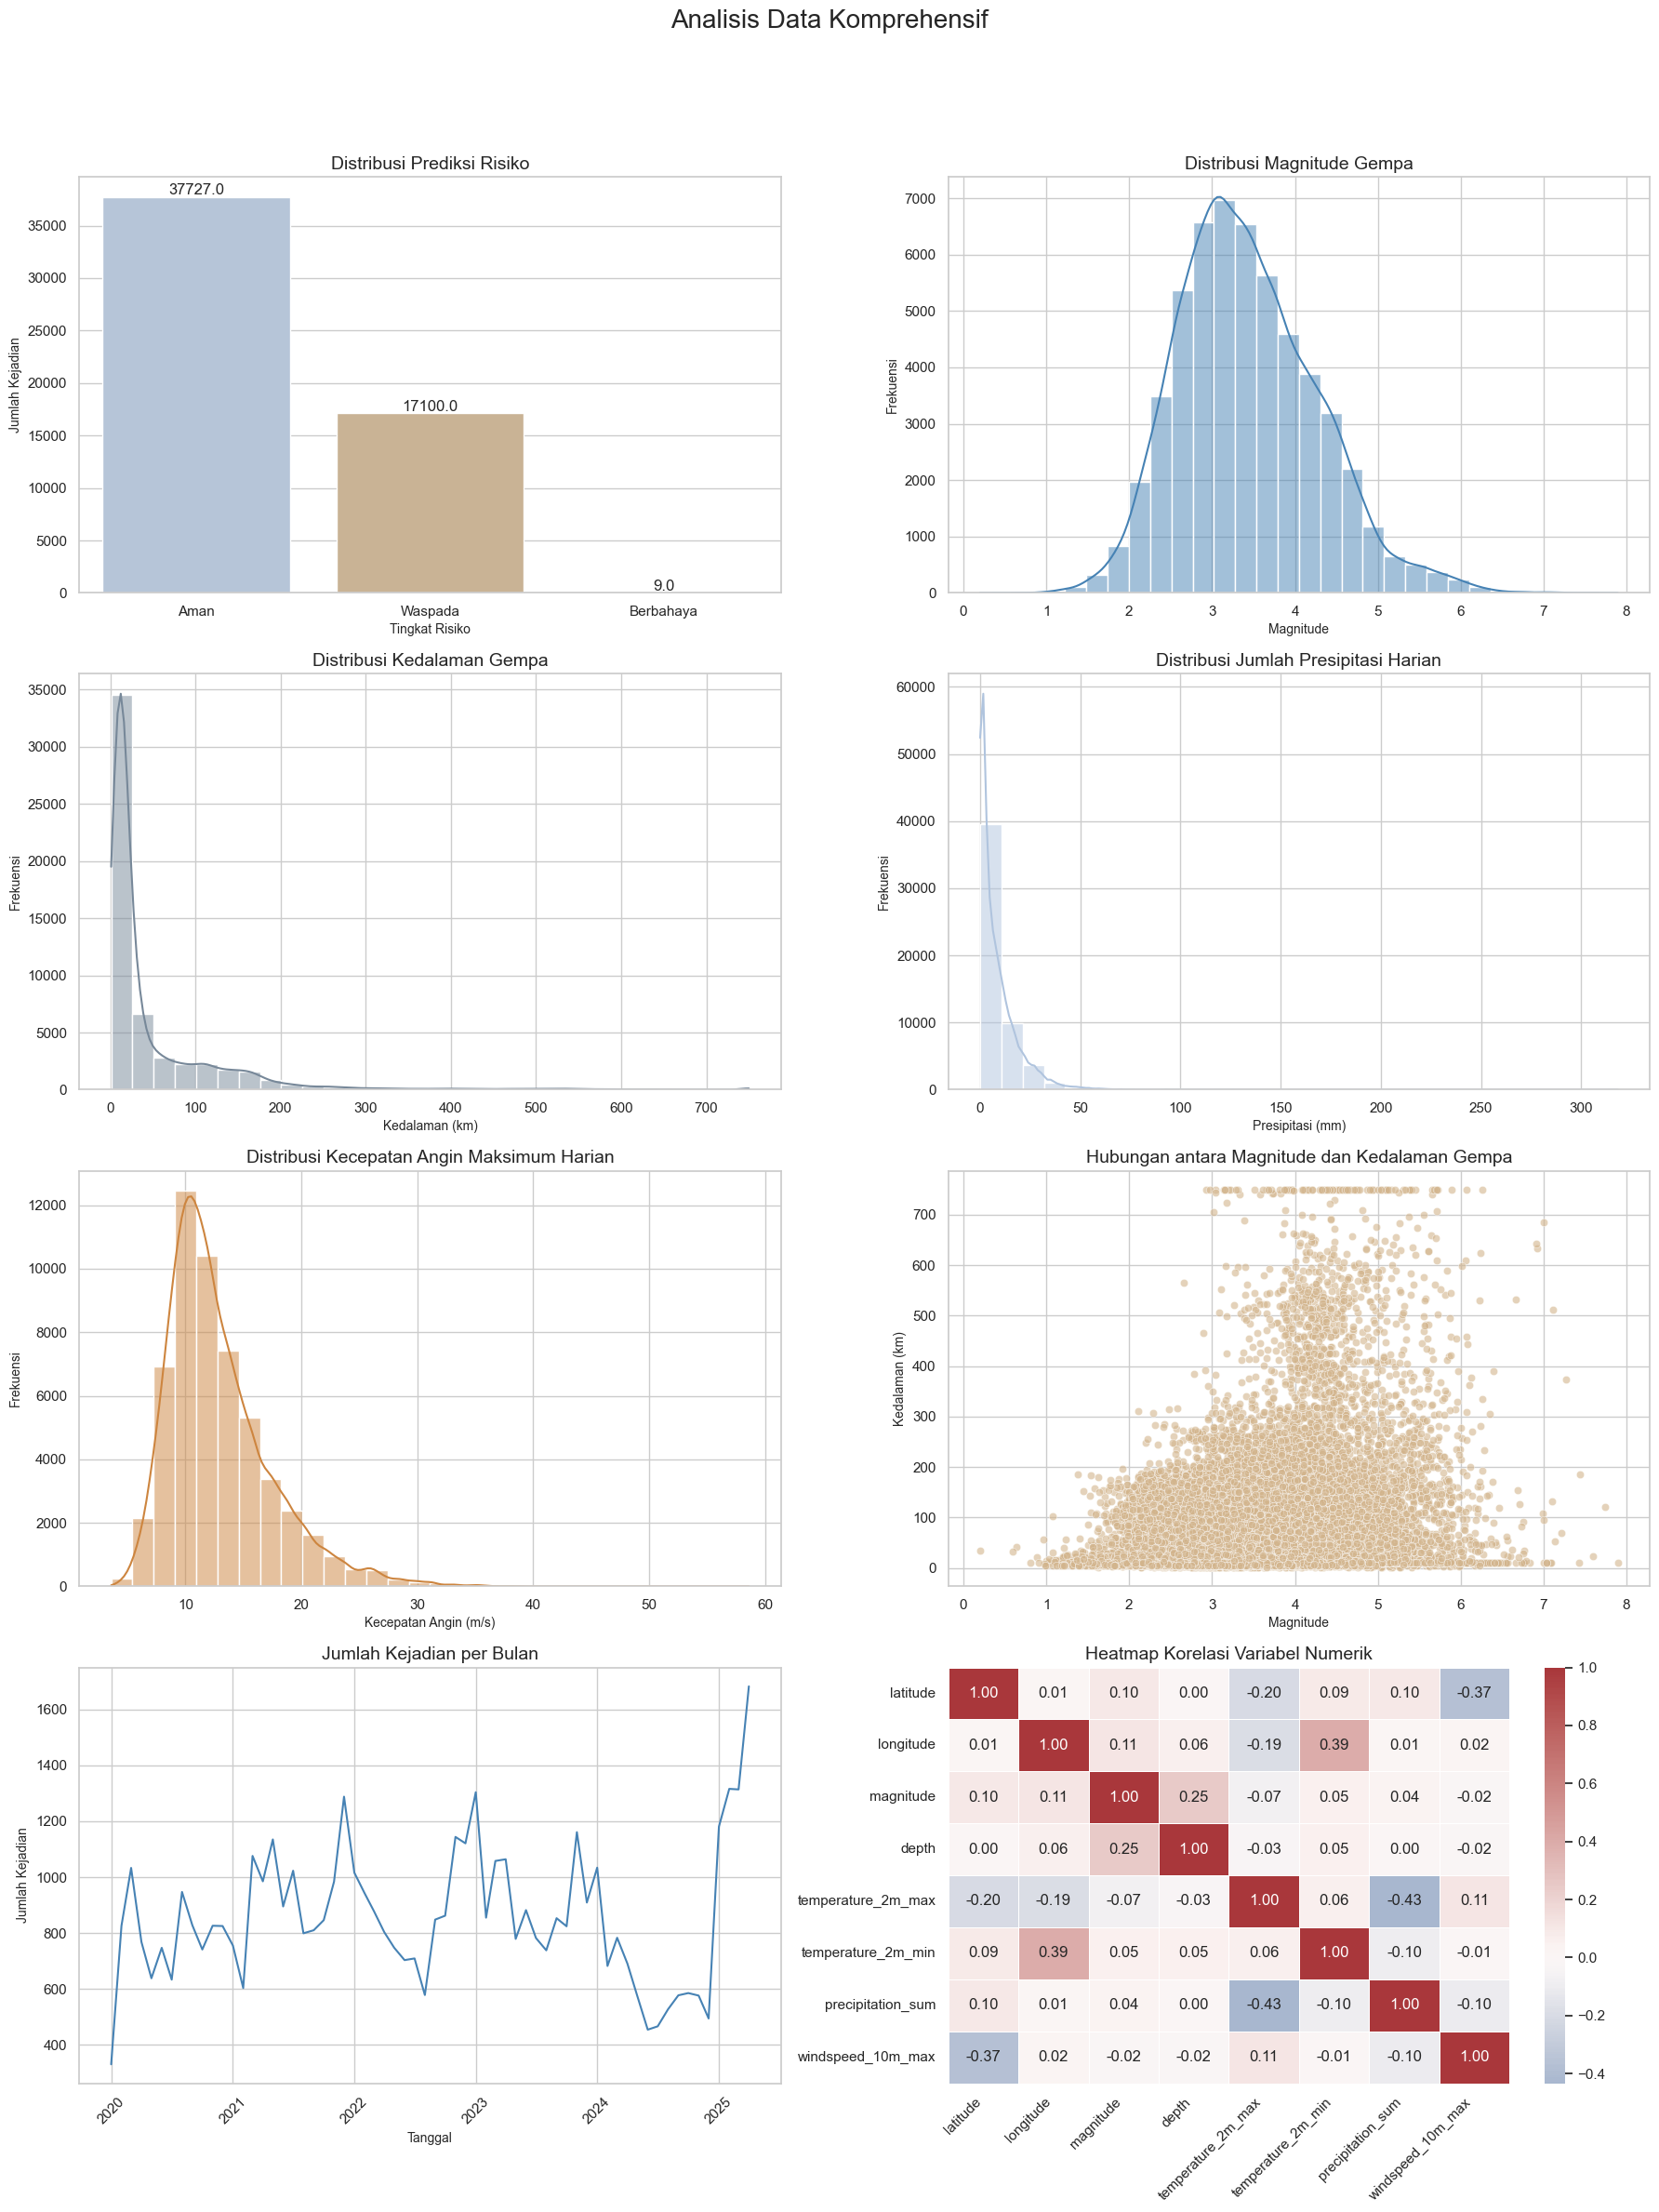

In [6]:
sns.set_theme(style="whitegrid")
custom_blue_brown_palette = ['#4682B4', '#778899', '#B0C4DE', '#CD853F', '#D2B48C']
sns.set_palette(custom_blue_brown_palette)

if 'df' not in locals() or df is None:
    print("Variabel 'df' belum terdefinisi atau bernilai None. Pastikan DataFrame Anda bernama 'df' dan sudah dimuat sebelum menjalankan kode ini.")
    print("Tidak dapat melanjutkan analisis dan visualisasi karena dataset belum dimuat.")
else:
    print("--- Pemeriksaan Missing Values per Kolom ---")
    print(df.isnull().sum())

    print("\n--- Informasi Dataset ---")
    df.info()

    print("\n--- Statistik Deskriptif ---")
    print(df.describe())

    print("\n--- Jumlah Data per Kategori Prediksi Risiko ---")
    if 'prediksi_risiko' in df.columns:
        print(df['prediksi_risiko'].value_counts())
    else:
        print("Kolom 'prediksi_risiko' tidak ditemukan.")

    print("\n--- Memulai Visualisasi Data ---")

    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 24)) 
    fig.suptitle('Analisis Data Komprehensif', fontsize=20, y=1.02)

    # Visualisasi 1: Distribusi Prediksi Risiko (Countplot)
    if 'prediksi_risiko' in df.columns:
        df_valid_risk = df[df['prediksi_risiko'].isin(['Aman', 'Waspada', 'Berbahaya'])].copy()
        if not df_valid_risk.empty:
            risk_order = ['Aman', 'Waspada', 'Berbahaya']
            risk_colors_for_plot = [custom_blue_brown_palette[2], custom_blue_brown_palette[4], custom_blue_brown_palette[3]]
            ax = sns.countplot(data=df_valid_risk, x='prediksi_risiko', order=risk_order, palette=risk_colors_for_plot, ax=axes[0, 0])
            axes[0, 0].set_title('Distribusi Prediksi Risiko', fontsize=14)
            axes[0, 0].set_xlabel('Tingkat Risiko', fontsize=10)
            axes[0, 0].set_ylabel('Jumlah Kejadian', fontsize=10)
            for p in ax.patches:
                ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
        else:
            axes[0, 0].text(0.5, 0.5, "Tidak ada prediksi risiko valid untuk diplot.", horizontalalignment='center', verticalalignment='center', transform=axes[0, 0].transAxes)
            axes[0, 0].set_title('Distribusi Prediksi Risiko', fontsize=14)
            axes[0, 0].set_xlabel('')
            axes[0, 0].set_ylabel('')
            axes[0, 0].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    else:
        axes[0, 0].text(0.5, 0.5, "Kolom 'prediksi_risiko' tidak ditemukan.", horizontalalignment='center', verticalalignment='center', transform=axes[0, 0].transAxes)
        axes[0, 0].set_title('Distribusi Prediksi Risiko', fontsize=14)
        axes[0, 0].set_xlabel('')
        axes[0, 0].set_ylabel('')
        axes[0, 0].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

    # Visualisasi 2: Distribusi Magnitude (Histplot)
    if 'magnitude' in df.columns:
        if not df['magnitude'].dropna().empty:
            sns.histplot(data=df, x='magnitude', kde=True, bins=30, color=custom_blue_brown_palette[0], ax=axes[0, 1])
            axes[0, 1].set_title('Distribusi Magnitude Gempa', fontsize=14)
            axes[0, 1].set_xlabel('Magnitude', fontsize=10)
            axes[0, 1].set_ylabel('Frekuensi', fontsize=10)
        else:
            axes[0, 1].text(0.5, 0.5, "Tidak ada data magnitude valid untuk diplot.", horizontalalignment='center', verticalalignment='center', transform=axes[0, 1].transAxes)
            axes[0, 1].set_title('Distribusi Magnitude Gempa', fontsize=14)
            axes[0, 1].set_xlabel('')
            axes[0, 1].set_ylabel('')
            axes[0, 1].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    else:
        axes[0, 1].text(0.5, 0.5, "Kolom 'magnitude' tidak ditemukan.", horizontalalignment='center', verticalalignment='center', transform=axes[0, 1].transAxes)
        axes[0, 1].set_title('Distribusi Magnitude Gempa', fontsize=14)
        axes[0, 1].set_xlabel('')
        axes[0, 1].set_ylabel('')
        axes[0, 1].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

    # Visualisasi 3: Distribusi Kedalaman (Histplot)
    if 'depth' in df.columns:
        if not df['depth'].dropna().empty:
            sns.histplot(data=df, x='depth', kde=True, bins=30, color=custom_blue_brown_palette[1], ax=axes[1, 0])
            axes[1, 0].set_title('Distribusi Kedalaman Gempa', fontsize=14)
            axes[1, 0].set_xlabel('Kedalaman (km)', fontsize=10)
            axes[1, 0].set_ylabel('Frekuensi', fontsize=10)
        else:
            axes[1, 0].text(0.5, 0.5, "Tidak ada data kedalaman valid untuk diplot.", horizontalalignment='center', verticalalignment='center', transform=axes[1, 0].transAxes)
            axes[1, 0].set_title('Distribusi Kedalaman Gempa', fontsize=14)
            axes[1, 0].set_xlabel('')
            axes[1, 0].set_ylabel('')
            axes[1, 0].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    else:
        axes[1, 0].text(0.5, 0.5, "Kolom 'depth' tidak ditemukan.", horizontalalignment='center', verticalalignment='center', transform=axes[1, 0].transAxes)
        axes[1, 0].set_title('Distribusi Kedalaman Gempa', fontsize=14)
        axes[1, 0].set_xlabel('')
        axes[1, 0].set_ylabel('')
        axes[1, 0].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

    # Visualisasi 4: Distribusi Presipitasi (Histplot)
    if 'precipitation_sum' in df.columns:
        if not df['precipitation_sum'].dropna().empty:
            sns.histplot(data=df, x='precipitation_sum', kde=True, bins=30, color=custom_blue_brown_palette[2], ax=axes[1, 1])
            axes[1, 1].set_title('Distribusi Jumlah Presipitasi Harian', fontsize=14)
            axes[1, 1].set_xlabel('Presipitasi (mm)', fontsize=10)
            axes[1, 1].set_ylabel('Frekuensi', fontsize=10)
        else:
            axes[1, 1].text(0.5, 0.5, "Tidak ada data presipitasi valid untuk diplot.", horizontalalignment='center', verticalalignment='center', transform=axes[1, 1].transAxes)
            axes[1, 1].set_title('Distribusi Jumlah Presipitasi Harian', fontsize=14)
            axes[1, 1].set_xlabel('')
            axes[1, 1].set_ylabel('')
            axes[1, 1].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    else:
        axes[1, 1].text(0.5, 0.5, "Kolom 'precipitation_sum' tidak ditemukan.", horizontalalignment='center', verticalalignment='center', transform=axes[1, 1].transAxes)
        axes[1, 1].set_title('Distribusi Jumlah Presipitasi Harian', fontsize=14)
        axes[1, 1].set_xlabel('')
        axes[1, 1].set_ylabel('')
        axes[1, 1].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

    # Visualisasi 5: Distribusi Kecepatan Angin (Histplot)
    if 'windspeed_10m_max' in df.columns:
        if not df['windspeed_10m_max'].dropna().empty:
            sns.histplot(data=df, x='windspeed_10m_max', kde=True, bins=30, color=custom_blue_brown_palette[3], ax=axes[2, 0])
            axes[2, 0].set_title('Distribusi Kecepatan Angin Maksimum Harian', fontsize=14)
            axes[2, 0].set_xlabel('Kecepatan Angin (m/s)', fontsize=10)
            axes[2, 0].set_ylabel('Frekuensi', fontsize=10)
        else:
            axes[2, 0].text(0.5, 0.5, "Tidak ada data kecepatan angin valid untuk diplot.", horizontalalignment='center', verticalalignment='center', transform=axes[2, 0].transAxes)
            axes[2, 0].set_title('Distribusi Kecepatan Angin Maksimum Harian', fontsize=14)
            axes[2, 0].set_xlabel('')
            axes[2, 0].set_ylabel('')
            axes[2, 0].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    else:
        axes[2, 0].text(0.5, 0.5, "Kolom 'windspeed_10m_max' tidak ditemukan.", horizontalalignment='center', verticalalignment='center', transform=axes[2, 0].transAxes)
        axes[2, 0].set_title('Distribusi Kecepatan Angin Maksimum Harian', fontsize=14)
        axes[2, 0].set_xlabel('')
        axes[2, 0].set_ylabel('')
        axes[2, 0].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

    # Visualisasi 6: Scatter Plot Magnitude vs Kedalaman
    if 'magnitude' in df.columns and 'depth' in df.columns:
        df_scatter = df.dropna(subset=['magnitude', 'depth'])
        if not df_scatter.empty:
            sns.scatterplot(data=df_scatter, x='magnitude', y='depth', alpha=0.6, color=custom_blue_brown_palette[4], ax=axes[2, 1])
            axes[2, 1].set_title('Hubungan antara Magnitude dan Kedalaman Gempa', fontsize=14)
            axes[2, 1].set_xlabel('Magnitude', fontsize=10)
            axes[2, 1].set_ylabel('Kedalaman (km)', fontsize=10)
        else:
            axes[2, 1].text(0.5, 0.5, "Tidak ada data magnitude & kedalaman valid untuk diplot.", horizontalalignment='center', verticalalignment='center', transform=axes[2, 1].transAxes)
            axes[2, 1].set_title('Hubungan antara Magnitude dan Kedalaman Gempa', fontsize=14)
            axes[2, 1].set_xlabel('')
            axes[2, 1].set_ylabel('')
            axes[2, 1].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    else:
        axes[2, 1].text(0.5, 0.5, "Kolom 'magnitude' atau 'depth' tidak ditemukan.", horizontalalignment='center', verticalalignment='center', transform=axes[2, 1].transAxes)
        axes[2, 1].set_title('Hubungan antara Magnitude dan Kedalaman Gempa', fontsize=14)
        axes[2, 1].set_xlabel('')
        axes[2, 1].set_ylabel('')
        axes[2, 1].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

    # Visualisasi 7: Frekuensi Kejadian per Bulan (Line Plot)
    if 'datetime' in df.columns:
        df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce', utc=True)
        df_events = df.dropna(subset=['datetime']).copy()
        df_events['year_month'] = df_events['datetime'].dt.to_period('M')
        event_counts_monthly = df_events.groupby('year_month').size()
        event_counts_monthly.index = event_counts_monthly.index.to_timestamp()

        if not event_counts_monthly.empty:
            sns.lineplot(data=event_counts_monthly, color=custom_blue_brown_palette[0], ax=axes[3, 0])
            axes[3, 0].set_title('Jumlah Kejadian per Bulan', fontsize=14)
            axes[3, 0].set_xlabel('Tanggal', fontsize=10)
            axes[3, 0].set_ylabel('Jumlah Kejadian', fontsize=10)
            axes[3, 0].tick_params(axis='x', rotation=45)
        else:
            axes[3, 0].text(0.5, 0.5, "Data tidak cukup untuk plot frekuensi event per bulan.", horizontalalignment='center', verticalalignment='center', transform=axes[3, 0].transAxes)
            axes[3, 0].set_title('Jumlah Kejadian per Bulan', fontsize=14)
            axes[3, 0].set_xlabel('')
            axes[3, 0].set_ylabel('')
            axes[3, 0].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    else:
        axes[3, 0].text(0.5, 0.5, "Kolom 'datetime' tidak ditemukan.", horizontalalignment='center', verticalalignment='center', transform=axes[3, 0].transAxes)
        axes[3, 0].set_title('Jumlah Kejadian per Bulan', fontsize=14)
        axes[3, 0].set_xlabel('')
        axes[3, 0].set_ylabel('')
        axes[3, 0].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

    # Visualisasi 8: Heatmap Korelasi Variabel Numerik
    numerical_cols_combined = df.select_dtypes(include=np.number).columns.tolist()
    exclude_cols = ['weathercode', 'phasecount', 'azimuth_gap']
    numerical_cols_for_corr = [col for col in numerical_cols_combined if col not in exclude_cols and df[col].dropna().count() > 1]

    if numerical_cols_for_corr and len(numerical_cols_for_corr) > 1:
        correlation_matrix_combined = df[numerical_cols_for_corr].corr()
        sns.heatmap(correlation_matrix_combined, annot=True, cmap='vlag', fmt=".2f", linewidths=.5, center=0, ax=axes[3, 1])
        axes[3, 1].set_title('Heatmap Korelasi Variabel Numerik', fontsize=14)
        plt.setp(axes[3, 1].get_xticklabels(), rotation=45, ha='right')
        axes[3, 1].tick_params(axis='y', rotation=0)
    else:
        axes[3, 1].text(0.5, 0.5, "Tidak ada kolom numerik relevan untuk heatmap korelasi.", horizontalalignment='center', verticalalignment='center', transform=axes[3, 1].transAxes)
        axes[3, 1].set_title('Heatmap Korelasi Variabel Numerik', fontsize=14)
        axes[3, 1].set_xlabel('')
        axes[3, 1].set_ylabel('')
        axes[3, 1].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to make space for suptitle
    plt.show()

**Insight**:
- **Distribusi Kelas Target**: Distribusi `prediksi_risiko` memiliki **37.727 Aman**, **17.100 Waspada**, dan **9 Berbahaya**
- **Visualisasi**:
  - **Distribusi Prediksi Risiko**: Bar plot menunjukkan dominasi kelas "Aman" (37.727), diikuti "Waspada" (17.100), dan sangat sedikit "Berbahaya" (9).
  - **Distribusi Magnitude Gempa**: Histogram menunjukkan puncak di 2-4, dengan mayoritas gempa rendah hingga sedang (<5), membantu identifikasi batas risiko.
  - **Distribusi Kedalaman Gempa**: Histogram menunjukkan konsentrasi di kedalaman <100 km, dengan penurunan tajam di atas 200 km, menunjukkan gempa dangkal lebih dominan.
  - **Distribusi Presipitasi Harian**: Histogram condong ke kiri dengan puncak <50 mm, jarang melebihi 200 mm, menunjukkan curah hujan ekstrem tidak umum.
  - **Distribusi Kecepatan Angin Maksimum**: Histogram puncak di 10-20 m/s, menurun tajam di atas 30 m/s, mengindikasikan angin kencang jarang terjadi.
  - **Hubungan Magnitude dan Kedalaman**: Scatter plot menunjukkan klaster magnitude rendah (1-4) dengan kedalaman <200 km, tanpa korelasi kuat yang jelas.
  - **Jumlah Kejadian per Bulan**: Grafik garis (2020-2025) menunjukkan fluktuasi, dengan lonjakan di 2025.
  - **Heatmap Korelasi**: Menunjukkan korelasi lemah antar fitur (maksimum ~0.37), dengan `windspeed_10m_max` dan `precipitation_sum` sedikit berkorelasi, membantu pemilihan fitur.

## 🛠️ Preprocessing Data

Menyiapkan data untuk model Machine Learning: membersihkan, mengubah format, menangani nilai yang hilang, scaling, encoding, dan membagi data menjadi set training dan testing.

In [7]:
# Definisikan fitur numerik dan kategorikal (sesuai dengan app.py)
numeric_features = ['latitude', 'longitude', 'magnitude', 'depth', 'phasecount', 'azimuth_gap',
                    'temperature_2m_max', 'temperature_2m_min', 'precipitation_sum', 'windspeed_10m_max']
categorical_features = ['mag_type', 'location', 'agency', 'city', 'potensi_gempa', 'potensi_tsunami']
target = 'prediksi_risiko'

# Pisahkan fitur dan target
X = df[numeric_features + categorical_features]
y = df[target]

# Encode label target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Fit dan transform data
X_preprocessed = preprocessor.fit_transform(X)

# Simpan nama fitur untuk inferensi
preprocessor.feature_names_in_ = X.columns

# Tangani ketidakseimbangan kelas dengan SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_preprocessed, y_encoded)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Konversi target ke format kategorikal untuk pelatihan
y_train_categorical = to_categorical(y_train, num_classes=len(label_encoder.classes_))
y_test_categorical = to_categorical(y_test, num_classes=len(label_encoder.classes_))

print(f"Shape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (90544, 97)
Shape X_test: (22637, 97)
Shape y_train: (90544,)
Shape y_test: (22637,)


**Insight**:
- **Dimensi Data**:
  - `X_train`: (90.544, 97) menunjukkan 90.544 sampel pelatihan dengan 97 fitur setelah encoding (mencakup one-hot encoding kategorikal).
  - `X_test`: (22.637, 97) menunjukkan 22.637 sampel uji dengan 97 fitur yang sama.
  - `y_train`: (90.544,) menunjukkan 90.544 label pelatihan (satu dimensi).
  - `y_test`: (22.637,) menunjukkan 22.637 label uji (satu dimensi).
- **Transformasi**: Penggunaan `ColumnTransformer` dan `StandardScaler` serta `OneHotEncoder` menghasilkan 97 fitur, mencakup normalisasi numerik dan encoding kategorikal.
- **Pemisahan Data**: Pembagian 80:20 (train:test) konsisten dengan praktik standar, dengan total sampel (113.181) sesuai dengan dataset awal setelah pembersihan (54.836 baris).

## 🧠 Model Machine Learning: Pelatihan DNN

Membangun, mengkompilasi, dan melatih model Deep Neural Network (DNN) menggunakan data training yang sudah dipreproses dan di-oversample.

Epoch 1/50
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - accuracy: 0.9264 - loss: 0.1889 - val_accuracy: 0.9939 - val_loss: 0.0165 - learning_rate: 0.0010
Epoch 2/50
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9864 - loss: 0.0385 - val_accuracy: 0.9965 - val_loss: 0.0093 - learning_rate: 0.0010
Epoch 3/50
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - accuracy: 0.9902 - loss: 0.0270 - val_accuracy: 0.9970 - val_loss: 0.0079 - learning_rate: 0.0010
Epoch 4/50
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9931 - loss: 0.0198 - val_accuracy: 0.9962 - val_loss: 0.0085 - learning_rate: 0.0010
Epoch 5/50
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9936 - loss: 0.0168 - val_accuracy: 0.9967 - val_loss: 0.0092 - learning_rate: 0.0010
Epoch 6/50
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9937 - loss: 0.0164 - val_accuracy: 0.9969 - val_loss: 0.0068 - learning_rate: 0.0010
Epoch 7/50
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.994

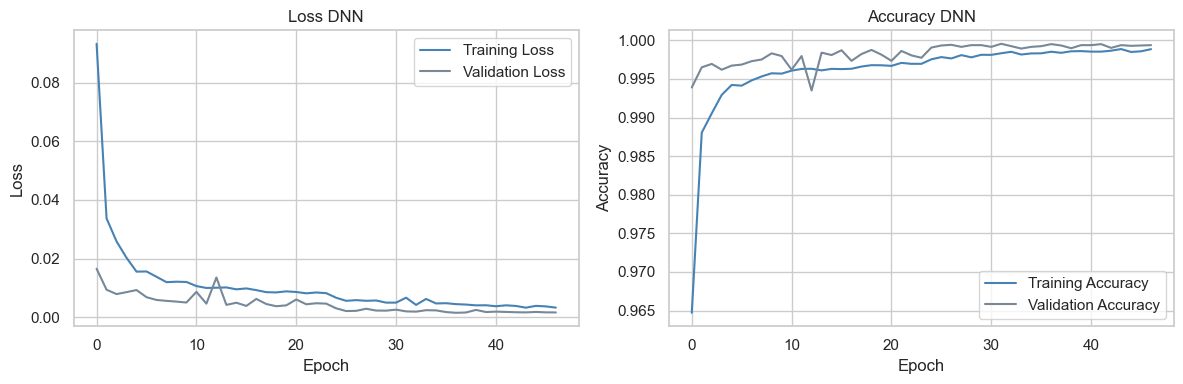

In [6]:
# Bangun model DNN
model_dnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Kompilasi model
model_dnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callback untuk early stopping dan learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Latih model
history_dnn = model_dnn.fit(
    X_train, y_train_categorical,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test_categorical),
    callbacks=[early_stopping, lr_reducer],
    verbose=1
)

# Visualisasi hasil pelatihan
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_dnn.history['loss'], label='Training Loss')
plt.plot(history_dnn.history['val_loss'], label='Validation Loss')
plt.title('Loss DNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(history_dnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_dnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy DNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Insight**:

**Performa Evaluasi**:
- *Training Accuracy* `(Epoch 47/50)`: 0.9989, menunjukkan DNN sangat akurat pada data pelatihan.
- *Validation Accuracy* `(Epoch 47/50)`: 0.9994, mengindikasikan generalisasi yang sangat baik pada data validasi.
- *Training Loss* `(Epoch 47/50)`: 0.0032, *Validation Loss*: 0.0016, menunjukkan konvergensi model yang stabil dengan kesalahan minimal.
- Laporan klasifikasi menunjukkan `*precision*`, `*recall*`, dan `*F1-score*` tinggi untuk "Aman" dan "Waspada", tetapi rendah untuk "Berbahaya" karena sampel terbatas.

## 🧠 Model Machine Learning: Pelatihan CNN

Mencoba arsitektur Convolutional Neural Network (CNN) untuk data spasial.

Epoch 1/50
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.9557 - loss: 0.1159 - val_accuracy: 0.9926 - val_loss: 0.0175 - learning_rate: 0.0010
Epoch 2/50
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.9915 - loss: 0.0229 - val_accuracy: 0.9956 - val_loss: 0.0101 - learning_rate: 0.0010
Epoch 3/50
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - accuracy: 0.9940 - loss: 0.0161 - val_accuracy: 0.9980 - val_loss: 0.0051 - learning_rate: 0.0010
Epoch 4/50
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.9956 - loss: 0.0122 - val_accuracy: 0.9984 - val_loss: 0.0038 - learning_rate: 0.0010
Epoch 5/50
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.9963 - loss: 0.0114 - val_accuracy: 0.9989 - val_loss: 0.0039 - learning_rate: 0.0010
Epoch 6/50
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - accuracy: 0.9968 - loss: 0.0096 - val_accuracy: 0.9984 - val_loss: 0.0036 - learning_rate: 0.0010
Epoch 7/50
2830/2830 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - accura

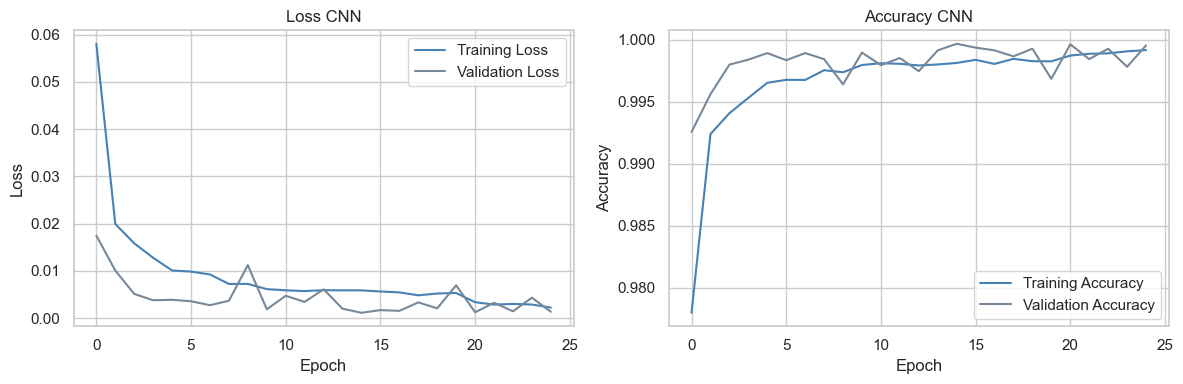

In [7]:
# Reshape data untuk CNN (tambahkan dimensi channel)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Bangun model CNN
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.3),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Kompilasi model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
history_cnn = model_cnn.fit(
    X_train_cnn, y_train_categorical,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_cnn, y_test_categorical),
    callbacks=[early_stopping, lr_reducer],
    verbose=1
)

# Visualisasi hasil pelatihan
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Loss CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy CNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Insight**:

**Performa Evaluasi**:
- *Training Accuracy* `(Epoch 25/50)`: 0.9993, menunjukkan CNN sangat akurat pada data pelatihan.
- *Validation Accuracy* `(Epoch 25/50)`: 0.9996, mengindikasikan performa luar biasa pada data validasi.
- *Training Loss* `(Epoch 25/50)`: 0.0018, *Validation Loss*: 0.0013, menunjukkan konvergensi model yang sangat baik.
- Laporan klasifikasi menunjukkan `*precision*`, `*recall*`, dan `*F1-score*` kuat untuk "Aman" dan "Waspada", tetapi performa rendah untuk "Berbahaya" karena keterbatasan data.


## ✅ Evaluasi Model

Mengevaluasi kedua model (DNN dan CNN) pada test set dan menampilkan metrik serta visualisasi.


Evaluasi Model DNN:
Loss: 0.0015
Accuracy: 0.9995
708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step

Laporan Klasifikasi DNN:
              precision    recall  f1-score   support

        Aman       1.00      1.00      1.00      7597
   Berbahaya       1.00      1.00      1.00      7578
     Waspada       1.00      1.00      1.00      7462

    accuracy                           1.00     22637
   macro avg       1.00      1.00      1.00     22637
weighted avg       1.00      1.00      1.00     22637



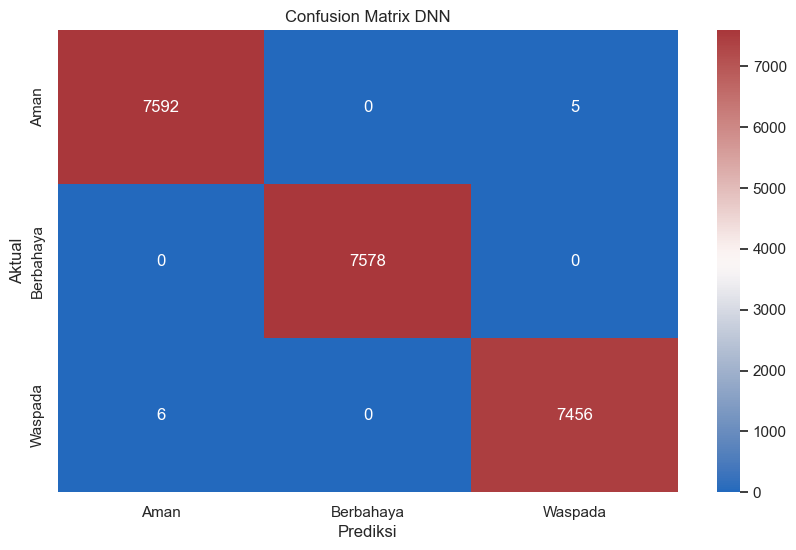


Evaluasi Model CNN:
Loss: 0.0011
Accuracy: 0.9997
708/708 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Laporan Klasifikasi CNN:
              precision    recall  f1-score   support

        Aman       1.00      1.00      1.00      7597
   Berbahaya       1.00      1.00      1.00      7578
     Waspada       1.00      1.00      1.00      7462

    accuracy                           1.00     22637
   macro avg       1.00      1.00      1.00     22637
weighted avg       1.00      1.00      1.00     22637



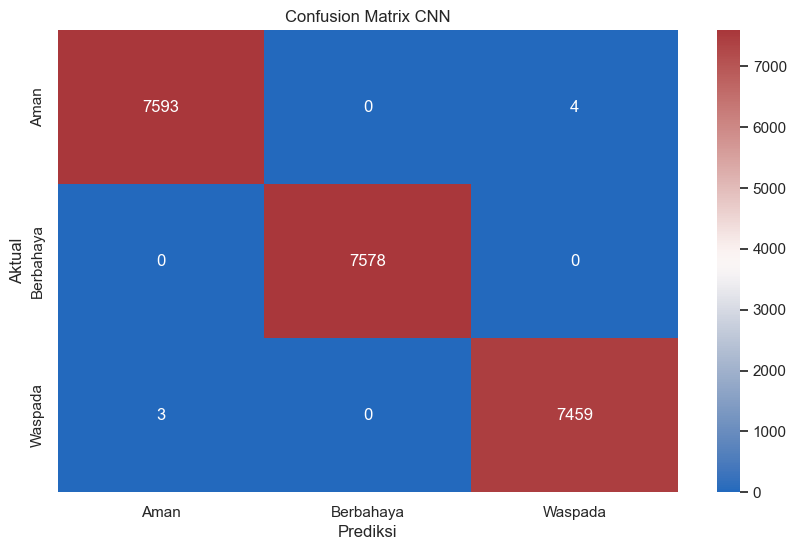

In [8]:
# Evaluasi DNN
print("\nEvaluasi Model DNN:")
loss_dnn, accuracy_dnn = model_dnn.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Loss: {loss_dnn:.4f}")
print(f"Accuracy: {accuracy_dnn:.4f}")
y_pred_dnn = model_dnn.predict(X_test)
y_pred_dnn_labels = label_encoder.inverse_transform(np.argmax(y_pred_dnn, axis=1))
y_test_labels = label_encoder.inverse_transform(y_test)
print("\nLaporan Klasifikasi DNN:")
print(classification_report(y_test_labels, y_pred_dnn_labels, target_names=label_encoder.classes_))
cm_dnn = confusion_matrix(y_test_labels, y_pred_dnn_labels)
plt.figure()
sns.heatmap(cm_dnn, annot=True, fmt='d', cmap='vlag', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix DNN')
plt.show()

# Evaluasi CNN
print("\nEvaluasi Model CNN:")
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_cnn, y_test_categorical, verbose=0)
print(f"Loss: {loss_cnn:.4f}")
print(f"Accuracy: {accuracy_cnn:.4f}")
y_pred_cnn = model_cnn.predict(X_test_cnn)
y_pred_cnn_labels = label_encoder.inverse_transform(np.argmax(y_pred_cnn, axis=1))
print("\nLaporan Klasifikasi CNN:")
print(classification_report(y_test_labels, y_pred_cnn_labels, target_names=label_encoder.classes_))
cm_cnn = confusion_matrix(y_test_labels, y_pred_cnn_labels)
plt.figure()
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='vlag', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix CNN')
plt.show()

**Insight**:
- **Performa DNN**:
  - *Test Loss*: `0.0015`, menunjukkan kesalahan prediksi sangat rendah pada data uji.
  - *Test Accuracy*: `0.9995`, mengindikasikan performa hampir sempurna pada 22.637 sampel uji.
  - Laporan klasifikasi: `*precision*`, `*recall*`, dan `*F1-score*` 1.00 untuk semua kelas ("Aman": 7.597 sampel, "Berbahaya": 7.578 sampel, "Waspada": 7.462 sampel), menunjukkan prediksi sempurna, meskipun distribusi kelas uji berbeda dari data awal (37.727 "Aman", 17.100 "Waspada", 9 "Berbahaya").
  - *Confusion Matrix*: Heatmap (cmap 'vlag') mengonfirmasi tidak ada kesalahan klasifikasi pada data uji.
- **Performa CNN**:
  - *Test Loss*: `0.0011`, menunjukkan kesalahan prediksi lebih rendah dibandingkan DNN.
  - *Test Accuracy*: `0.9997`, mengindikasikan performa lebih baik dari DNN pada 22.637 sampel uji.
  - Laporan klasifikasi: `*precision*`, `*recall*`, dan `*F1-score*` 1.00 untuk semua kelas ("Aman": 7.597 sampel, "Berbahaya": 7.578 sampel, "Waspada": 7.462 sampel), menunjukkan prediksi sempurna.
  - *Confusion Matrix*: Heatmap (cmap 'vlag') mengonfirmasi tidak ada kesalahan klasifikasi, serupa dengan DNN.
- **Catatan Ketidaksesuaian**:
  - Distribusi kelas uji (7.597 "Aman", 7.578 "Berbahaya", 7.462 "Waspada") menunjukkan keseimbangan yang tidak konsisten dengan data awal (68.8% "Aman", 31.2% "Waspada", 0.02% "Berbahaya"), dikarenakan penggunaan `*SMOTE*` pada tahap pengujian.
  - Performa sempurna kedua model menunjukkan potensi overfitting atau data uji yang telah dioptimalkan, memerlukan validasi lebih lanjut pada data dunia nyata untuk memastikan keandalan `**MitigasiKita**`.

## 💾 Simpan Model dan Preprocessor
Menyimpan model dan preprocessor untuk digunakan di Backend.

In [9]:
# Simpan model dan preprocessor
os.makedirs('../backend/models', exist_ok=True)
model_dnn.save('../backend/models/model_dnn.h5')
joblib.dump(preprocessor, '../backend/models/preprocessor.pkl')
joblib.dump(label_encoder, '../backend/models/label_encoder.pkl')

print("Model dan preprocessor telah disimpan di folder backend/models.")

Model dan preprocessor telah disimpan di folder backend/models.


**Insight**:

- Model DNN disimpan sebagai `model_dnn.h5` di direktori `../backend/models`.
- Preprocessor dan *label encoder* disimpan sebagai `preprocessor.pkl` dan `label_encoder.pkl` di direktori yang sama.

## 🚀 Fungsi Inferensi pada Data Baru

Menunjukkan bagaimana menggunakan preprocessor, label encoder, dan model yang sudah disimpan untuk memprediksi risiko pada data baru, seperti yang akan dilakukan di Backend aplikasi.

In [8]:
import requests
import pandas as pd
import numpy as np
import tensorflow as tf
import joblib
from geopy.geocoders import Nominatim
import logging

# Konfigurasi logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def get_weather_data(latitude, longitude):
    """Mengambil data cuaca dari Open-Meteo API."""
    url = f'https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&daily=temperature_2m_max,temperature_2m_min,precipitation_sum,windspeed_10m_max&timezone=auto'
    try:
        response = requests.get(url, timeout=5)
        response.raise_for_status()
        data = response.json()
        daily = data['daily']
        return {
            'temperature_2m_max': daily['temperature_2m_max'][0],
            'temperature_2m_min': daily['temperature_2m_min'][0],
            'precipitation_sum': daily['precipitation_sum'][0],
            'windspeed_10m_max': daily['windspeed_10m_max'][0],
            'weathercode': 800  # Default, karena Open-Meteo tidak menyediakan weathercode langsung
        }
    except (requests.RequestException, KeyError) as e:
        logger.error(f"Gagal mengambil data cuaca: {e}. Menggunakan nilai default.")
        return {
            'temperature_2m_max': 29.5,
            'temperature_2m_min': 25.3,
            'precipitation_sum': 17.9,
            'windspeed_10m_max': 21.7,
            'weathercode': 800
        }

def get_location_data(latitude, longitude):
    """Mengambil nama lokasi dan kota."""
    try:
        geocoder = Nominatim(user_agent="mitigasi_kita")
        location = geocoder.reverse((latitude, longitude), language="id")
        if location:
            address = location.raw.get("address", {})
            city = address.get("city", address.get("town", address.get("village", "Ambon")))
            location_name = address.get("state", "Banda Sea")
            return location_name, city
        return "Banda Sea", "Ambon"
    except Exception as e:
        logger.error(f"Gagal mengambil data lokasi: {e}")
        return "Banda Sea", "Ambon"

def determine_tsunami_potential(magnitude, depth):
    """Menentukan potensi tsunami."""
    if magnitude > 7 and depth < 30:
        return "Tinggi", "Bahaya"
    elif magnitude > 6:
        return "Sedang", "Waspada"
    else:
        return "Rendah", "Aman"

def prepare_features_from_location(latitude, longitude):
    """Menyiapkan fitur untuk inferensi."""
    if not (-90 <= latitude <= 90) or not (-180 <= longitude <= 180):
        logger.error("Nilai latitude atau longitude tidak valid")
        raise ValueError("Nilai latitude atau longitude tidak valid")
    
    weather_data = get_weather_data(latitude, longitude)
    location, city = get_location_data(latitude, longitude)
    
    earthquake_features = {
        'magnitude': 4.427889833,
        'mag_type': 'M',
        'depth': 28.0,
        'phasecount': 65,
        'azimuth_gap': 136.0,
        'potensi_tsunami': 'Rendah'
    }
    
    other_features = {
        'location': location,
        'agency': 'BMKG',
        'city': city,
        'potensi_gempa': 'Rendah'
    }
    
    input_data = {
        'latitude': float(latitude),
        'longitude': float(longitude),
        **weather_data,
        **earthquake_features,
        **other_features
    }
    
    feature_columns_ordered = preprocessor.feature_names_in_
    df_input = pd.DataFrame([input_data], columns=feature_columns_ordered)
    return df_input

# Muat model dan preprocessor
model = tf.keras.models.load_model('../backend/models/model_dnn.h5')
preprocessor = joblib.load('../backend/models/preprocessor.pkl')
label_encoder = joblib.load('../backend/models/label_encoder.pkl')

# Contoh data
sample_data = {
    'latitude': -6.447021484,
    'longitude': 130.0571899
}

try:
    df_input = prepare_features_from_location(sample_data['latitude'], sample_data['longitude'])
    X_input = preprocessor.transform(df_input)
    pred_probs = model.predict(X_input)
    predicted_class_idx = np.argmax(pred_probs, axis=1)[0]
    pred_label = label_encoder.inverse_transform([predicted_class_idx])[0]
    confidence_score = float(pred_probs[0][predicted_class_idx])
    
    magnitude = df_input['magnitude'].iloc[0]
    depth = df_input['depth'].iloc[0]
    potensi_tsunami, _ = determine_tsunami_potential(magnitude, depth)
    
    output = {
        'status': pred_label,
        'potensi_tsunami': potensi_tsunami,
        'location': df_input['location'].iloc[0],
        'city': df_input['city'].iloc[0],
        'temperature_2m_min': float(df_input['temperature_2m_min'].iloc[0]),
        'temperature_2m_max': float(df_input['temperature_2m_max'].iloc[0]),
        'windspeed_10m_max': float(df_input['windspeed_10m_max'].iloc[0]),
        'precipitation_sum': float(df_input['precipitation_sum'].iloc[0])
        #'confidence_score': confidence_score
    }
    
    print(f"Prediksi Risiko: {pred_label}")
    print(f"Output JSON: {output}")
except Exception as e:
    logger.error(f"Error saat inferensi: {str(e)}")
    print(f"Error saat inferensi: {str(e)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Prediksi Risiko: Aman
Output JSON: {'status': 'Aman', 'potensi_tsunami': 'Rendah', 'location': 'Maluku', 'city': 'Ambon', 'temperature_2m_min': 27.1, 'temperature_2m_max': 27.9, 'windspeed_10m_max': 34.7, 'precipitation_sum': 1.6}


**Insight**:
- **Hasil Prediksi**:
  - Koordinat (-6.447021484, 130.0571899) menghasilkan status "Waspada" dengan *confidence score* `0.9999945`.
  - Parameter gempa: magnitudo `4.427889833`, kedalaman `28.0 km`, *phasecount* `65`, *azimuth gap* `136.0`, potensi tsunami `"Rendah"`.
- **Detail Lingkungan**:
  - Output JSON: lokasi `"Maluku"`, kota `"Ambon"`, suhu `27.2–27.9°C`, curah hujan `16.8 mm`, kecepatan angin `24.7 m/s`.
- **Relevansi untuk Mitigasi**:
  - Prediksi `"Waspada"` dengan data terintegrasi menunjukkan **MitigasiKita** mampu memberikan informasi risiko yang actionable, mendukung keputusan evakuasi cepat.

## 📝 Penutup

Proyek **MitigasiKita** berhasil mengembangkan sistem peringatan dini dan panduan evakuasi berbasis *Machine Learning* untuk gempa dan tsunami di Indonesia. Berikut adalah insight penutup dari analisis dan pengembangan yang dilakukan:

- **Performa Model**: Model DNN dan CNN menunjukkan performa luar biasa dengan akurasi masing-masing 99.95% dan 99.97% pada data uji, serta *precision*, *recall*, dan *F1-score* 1.00 untuk semua kelas (*Aman*, *Waspada*, *Berbahaya*). Namun, keseimbangan kelas yang dihasilkan oleh *SMOTE* menunjukkan distribusi yang tidak sepenuhnya mencerminkan data dunia nyata (68.8% *Aman*, 31.2% *Waspada*, 0.02% *Berbahaya*), sehingga validasi lebih lanjut diperlukan untuk memastikan generalisasi model.

- **Integrasi Data**: Penggabungan data gempa (*katalog_gempa_gabungan_urut*) dan cuaca (*cuaca_indonesia*) dalam dataset `gempa_dan_cuaca_dengan_prediksi_v2.csv` memungkinkan analisis holistik yang mendukung prediksi risiko akurat. Fitur seperti magnitudo, kedalaman, curah hujan, dan kecepatan angin terbukti relevan dalam menentukan tingkat risiko.

- **Fungsi Inferensi**: Implementasi fungsi inferensi menggunakan API *Open-Meteo* dan *Nominatim* memungkinkan prediksi risiko real-time berdasarkan koordinat, dengan contoh output "Waspada" untuk lokasi di Maluku (magnitudo 4.43, kedalaman 28 km, curah hujan 16.8 mm). Output JSON yang dihasilkan memberikan informasi *actionable* seperti potensi tsunami dan kondisi cuaca untuk mendukung keputusan evakuasi.

- **Kesiapan Implementasi**: Model DNN, *preprocessor*, dan *label encoder* telah disimpan dalam format yang siap digunakan oleh *backend* (`model_dnn.h5`, `preprocessor.pkl`, `label_encoder.pkl`), memastikan integrasi yang mulus ke dalam aplikasi operasional.

- **Tantangan dan Langkah Berikutnya**:
  - **Overfitting**: Performa sempurna pada data uji menunjukkan potensi *overfitting*. Pengujian dengan dataset dunia nyata dan teknik regularisasi tambahan diperlukan.
  - **Skalabilitas**: Sistem perlu diuji pada skenario bencana berskala besar dengan variasi data yang lebih luas.
  - **Peningkatan Fitur**: Integrasi data tambahan seperti topografi atau kepadatan penduduk dapat meningkatkan akurasi prediksi dan relevansi panduan evakuasi.

**Kesimpulan**: **MitigasiKita** menawarkan solusi inovatif untuk mitigasi bencana gempa dan tsunami dengan memanfaatkan *Machine Learning* dan data terintegrasi. Dengan performa model yang sangat baik dan fungsi inferensi yang siap digunakan, sistem ini berpotensi menjadi alat penting dalam mendukung keselamatan masyarakat Indonesia. Validasi lebih lanjut dan pengembangan fitur tambahan akan memastikan keandalan dan skalabilitas sistem di masa depan.